# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Leitura inicial dos dados

In [4]:
dados = pd.read_csv("StudentsPerformance.csv")

dados.shape

(1000, 8)

In [5]:
dados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Inspeção da Base de Dados

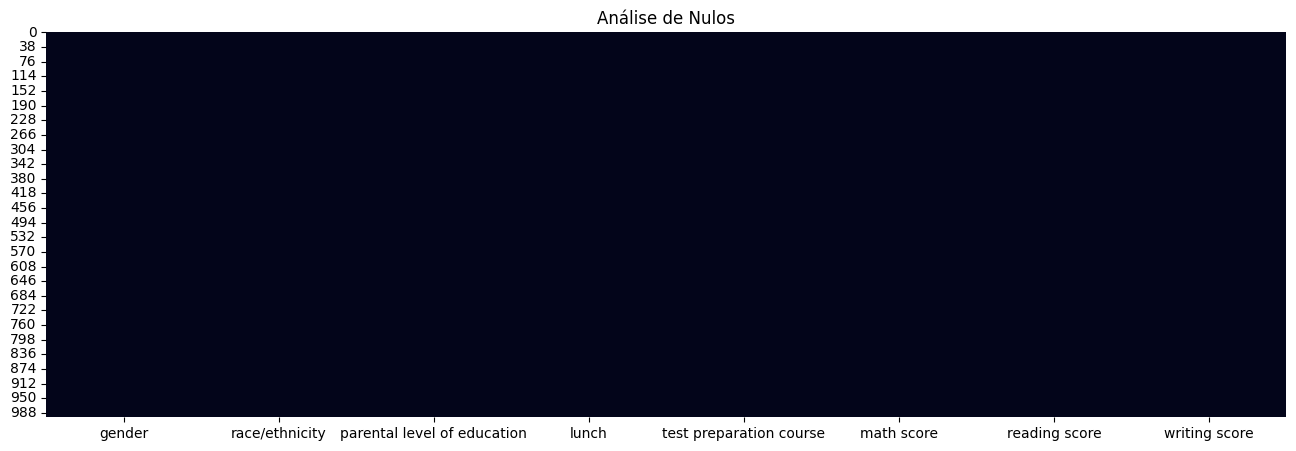

In [7]:
nulos = dados.isnull()

plt.figure(figsize=(16, 5))
plt.title("Análise de Nulos")
sns.heatmap(nulos, cbar=False);

In [8]:
nulos.sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [9]:
dados.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [11]:
dados.duplicated().sum()

np.int64(0)

In [13]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
dados.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Análises Categóricas

In [14]:
dados["gender"].value_counts(normalize = True) * 100

,proportion
gender,
female,51.8
male,48.2


In [15]:
dados["race/ethnicity"].value_counts(normalize = True) * 100

,proportion
race/ethnicity,
group C,31.9
group D,26.2
group B,19.0
group E,14.0
group A,8.9


In [16]:
dados["parental level of education"].value_counts(normalize = True) * 100

,proportion
parental level of education,
some college,22.6
associate's degree,22.2
high school,19.6
some high school,17.9
bachelor's degree,11.8
master's degree,5.9


In [17]:
dados["lunch"].value_counts(normalize = True) * 100

,proportion
lunch,
standard,64.5
free/reduced,35.5


In [18]:
dados["test preparation course"].value_counts(normalize = True) * 100

,proportion
test preparation course,
none,64.2
completed,35.8


# Análise de Distribuição de Notas

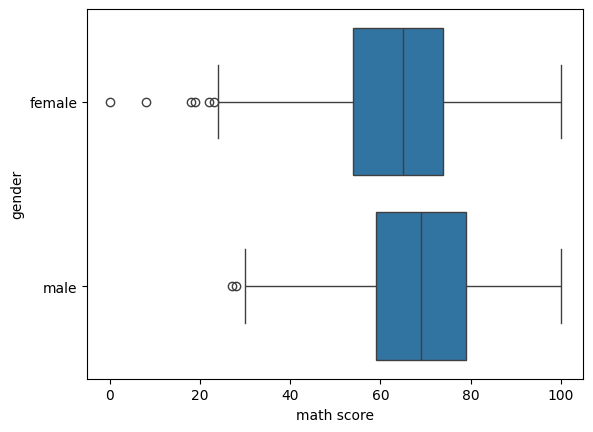

In [20]:
sns.boxplot(data =  dados, x = "math score", y = "gender");

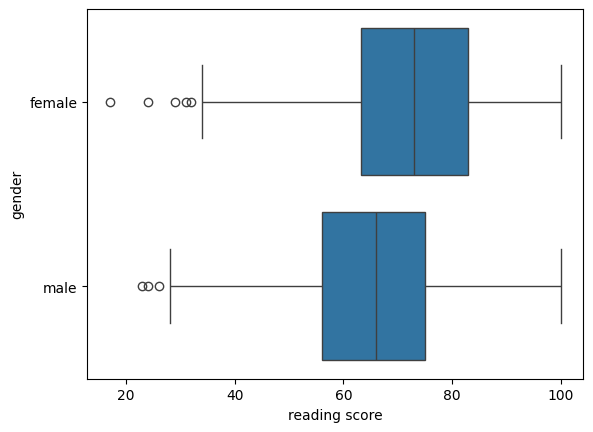

In [21]:
sns.boxplot(data =  dados, x = "reading score", y = "gender");

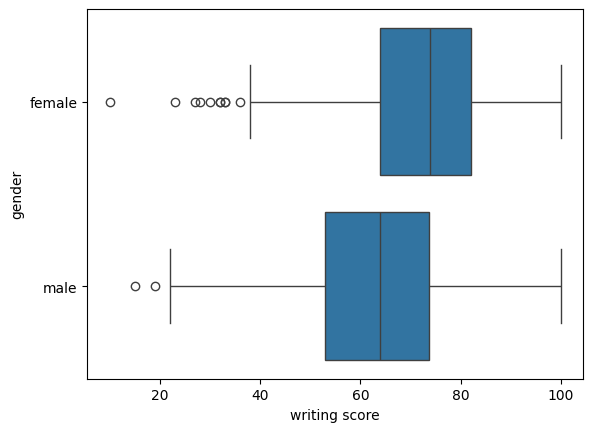

In [22]:
sns.boxplot(data =  dados, x = "writing score", y = "gender");

In [27]:
dados.groupby("gender").describe()["math score"].reset_index()

,gender,count,mean,std,min,25%,50%,75%,max
0,female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
1,male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


In [41]:
dados.groupby("gender").describe()["reading score"].reset_index()

,gender,count,mean,std,min,25%,50%,75%,max
0,female,518.0,72.608108,14.378245,17.0,63.25,73.0,83.0,100.0
1,male,482.0,65.473029,13.931832,23.0,56.00,66.0,75.0,100.0


In [42]:
dados.groupby("gender").describe()["writing score"].reset_index()

,gender,count,mean,std,min,25%,50%,75%,max
0,female,518.0,72.467181,14.844842,10.0,64.0,74.0,82.00,100.0
1,male,482.0,63.311203,14.113832,15.0,53.0,64.0,73.75,100.0


# Análise de Distribuição de Raça e Etnia

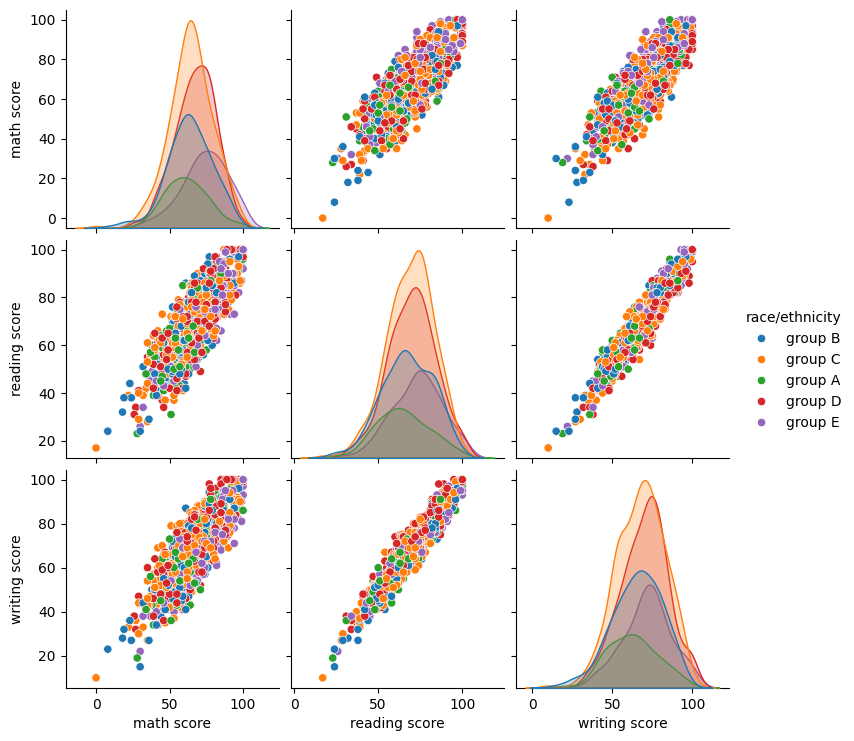

In [31]:
sns.pairplot(dados, hue = "race/ethnicity");

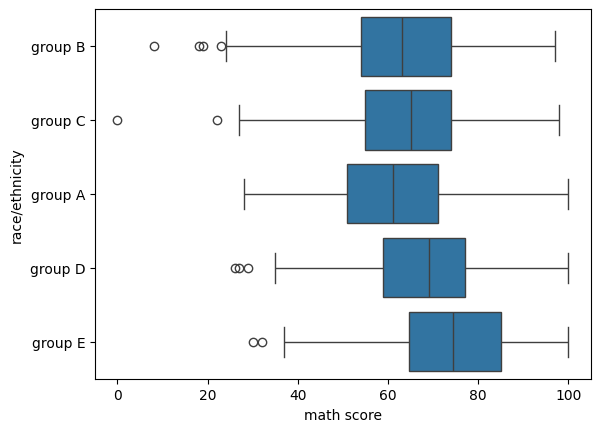

In [32]:
sns.boxplot(data = dados, x = "math score", y = "race/ethnicity");

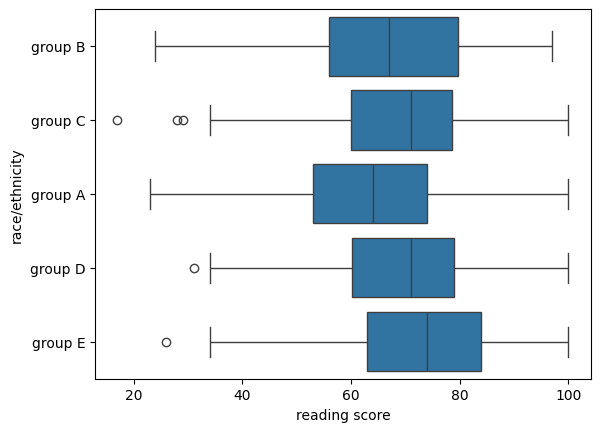

In [43]:
sns.boxplot(data = dados, x = "reading score", y = "race/ethnicity");

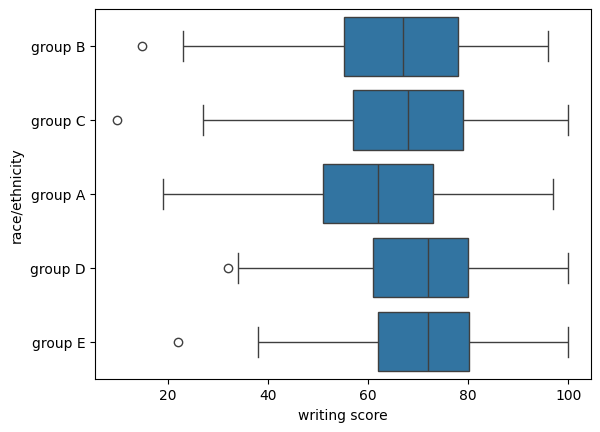

In [44]:
sns.boxplot(data = dados, x = "writing score", y = "race/ethnicity");

# Análise de Distribuição Parental

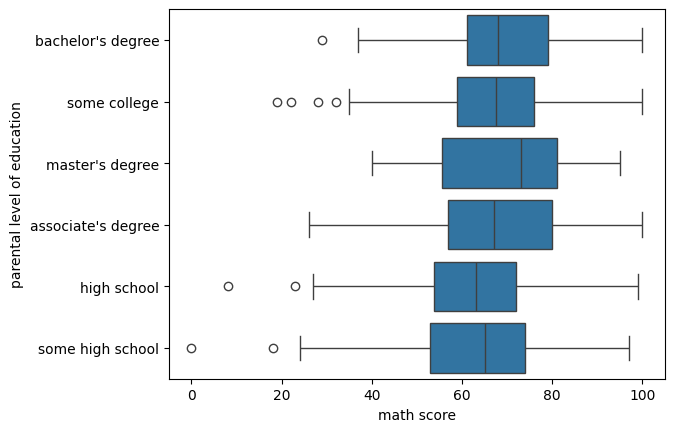

In [33]:
sns.boxplot(data = dados, x = "math score", y = "parental level of education");

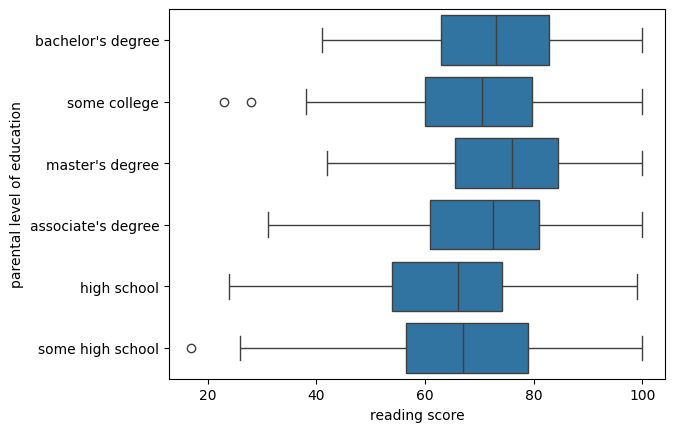

In [45]:
sns.boxplot(data = dados, x = "reading score", y = "parental level of education");

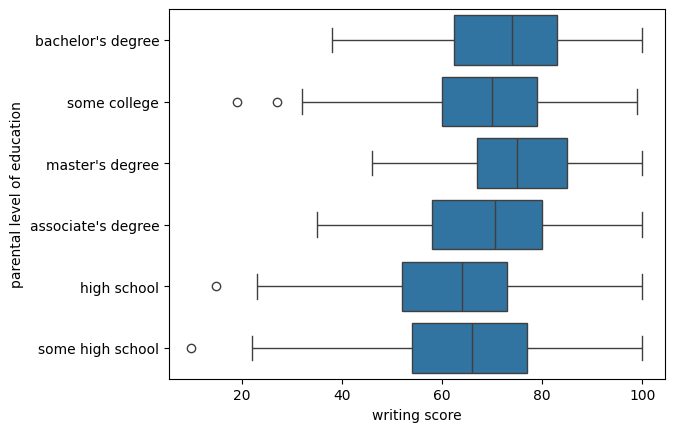

In [46]:
sns.boxplot(data = dados, x = "writing score", y = "parental level of education");

In [34]:
dados.groupby("parental level of education").describe()["math score"].reset_index()

,parental level of education,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,67.882883,15.112093,26.0,57.00,67.0,80.0,100.0
1,bachelor's degree,118.0,69.389831,14.943789,29.0,61.00,68.0,79.0,100.0
2,high school,196.0,62.137755,14.539651,8.0,53.75,63.0,72.0,99.0
3,master's degree,59.0,69.745763,15.153915,40.0,55.50,73.0,81.0,95.0
4,some college,226.0,67.128319,14.312897,19.0,59.00,67.5,76.0,100.0
5,some high school,179.0,63.497207,15.927989,0.0,53.00,65.0,74.0,97.0


In [47]:
dados.groupby("parental level of education").describe()["reading score"].reset_index()

,parental level of education,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,70.927928,13.868948,31.0,61.0,72.5,81.00,100.0
1,bachelor's degree,118.0,73.000000,14.285250,41.0,63.0,73.0,82.75,100.0
2,high school,196.0,64.704082,14.132130,24.0,54.0,66.0,74.25,99.0
3,master's degree,59.0,75.372881,13.775163,42.0,65.5,76.0,84.50,100.0
4,some college,226.0,69.460177,14.057049,23.0,60.0,70.5,79.75,100.0
5,some high school,179.0,66.938547,15.479295,17.0,56.5,67.0,79.00,100.0


In [48]:
dados.groupby("parental level of education").describe()["writing score"].reset_index()

,parental level of education,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,69.896396,14.311122,35.0,58.0,70.5,80.0,100.0
1,bachelor's degree,118.0,73.381356,14.728262,38.0,62.5,74.0,83.0,100.0
2,high school,196.0,62.448980,14.085907,15.0,52.0,64.0,73.0,100.0
3,master's degree,59.0,75.677966,13.730711,46.0,67.0,75.0,85.0,100.0
4,some college,226.0,68.840708,15.012331,19.0,60.0,70.0,79.0,99.0
5,some high school,179.0,64.888268,15.736197,10.0,54.0,66.0,77.0,100.0


# Análise de Preparação Pré-Prova

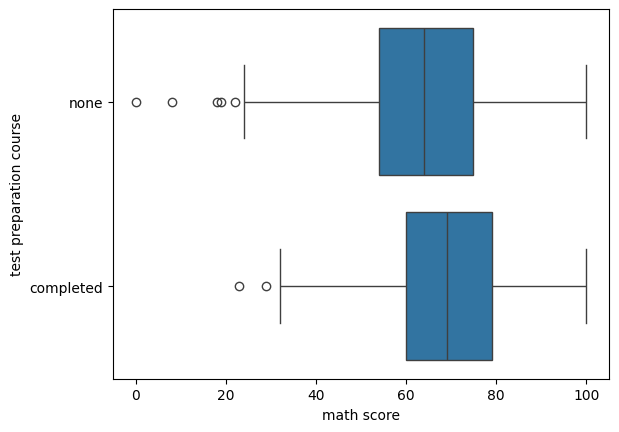

In [36]:
sns.boxplot(data = dados, x = "math score", y = "test preparation course");

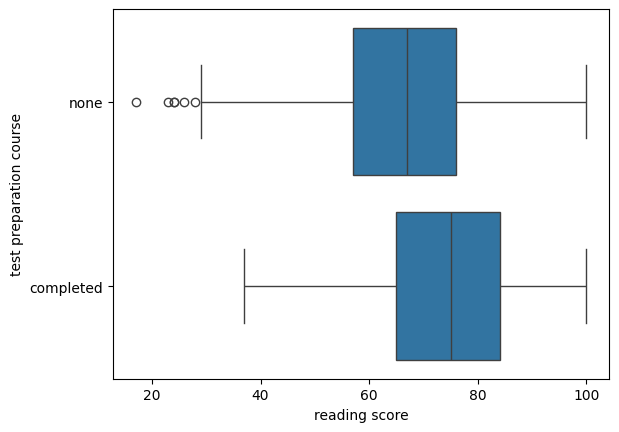

In [52]:
sns.boxplot(data = dados, x = "reading score", y = "test preparation course");

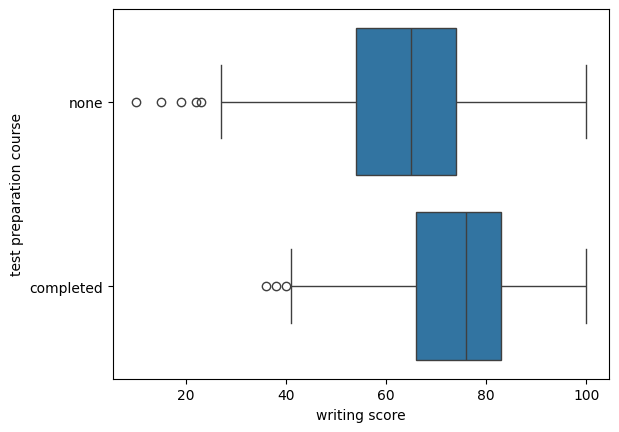

In [53]:
sns.boxplot(data = dados, x = "writing score", y = "test preparation course");

In [54]:
dados.groupby("test preparation course").describe()["math score"].reset_index()

,test preparation course,count,mean,std,min,25%,50%,75%,max
0,completed,358.0,69.695531,14.444699,23.0,60.0,69.0,79.00,100.0
1,none,642.0,64.077882,15.192376,0.0,54.0,64.0,74.75,100.0


In [55]:
dados.groupby("test preparation course").describe()["reading score"].reset_index()

,test preparation course,count,mean,std,min,25%,50%,75%,max
0,completed,358.0,73.893855,13.638384,37.0,65.0,75.0,84.0,100.0
1,none,642.0,66.534268,14.463885,17.0,57.0,67.0,76.0,100.0


In [56]:
dados.groupby("test preparation course").describe()["writing score"].reset_index()

,test preparation course,count,mean,std,min,25%,50%,75%,max
0,completed,358.0,74.418994,13.375335,36.0,66.0,76.0,83.0,100.0
1,none,642.0,64.504673,14.999661,10.0,54.0,65.0,74.0,100.0


# Análise de Relação de Notas

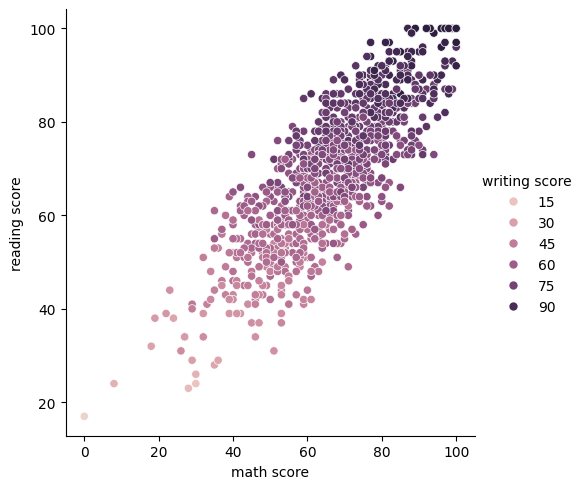

In [61]:
sns.relplot(dados, x = "math score", y = "reading score", hue = "writing score");